# Lexical Class Predictions based on features of ASL signs

## Setup code

In [1]:
import pandas as pd
from enum import Enum
import numpy as np
import matplotlib
from matplotlib import pylab as plt

## Import data

In [2]:

folder = "asl-lex/Data Files/"
data_file = folder + "signdata.csv"
key_file = folder + "signdataKEY.csv"
encoding = "ISO-8859-1"

df = pd.read_csv(data_file, encoding=encoding)
df_key = pd.read_csv(key_file, encoding=encoding)

## Describe overall shape and features

In [3]:
# num data points
print(f"there are {len(df)} data points")

# num features
print(f"there are {len(df.columns)} features")

# feature names
def print_features(features=None):
    if features:
        feature_df = df_key[df_key.iloc[:, 0].isin(features)]
    else:
        feature_df = df_key

    for row in feature_df.itertuples():
        print(f"{row._1}: {row.VariableDefinition}")

features = [
    'EntryID',
    'LemmaID',
    'EnglishWF(lg10)',
    'SignFrequency(M)',
    'Unknown',
    'DominantTranslation',
    'DominantTranslationAgreement',
    'Iconicity(M)',
    'NondominantTranslations',
    'D.Iconicity(M)',
    'GuessConsistency',
    'GuessAccuracy',
    'Transparency(M)',
    'LexicalClass',
    'Initialized.2.0',
    'FingerspelledLoanSign.2.0',
    'Compound.2.0',
    'NumberOfMorphemes.2.0',
    'SignDuration(ms)',
    'SelectedFingers.2.0',
    'Flexion.2.0',
    'FlexionChange.2.0',
    'Spread.2.0',
    'SpreadChange.2.0',
    'ThumbPosition.2.0: Position of the thumb',
    'ThumbContact.2.0',
    'SignType.2.0',
    'Movement.2.0',
    'RepeatedMovement.2.0',
    'MajorLocation.2.0',
    'MinorLocation.2.0',
    'SecondMinorLocation.2.0',
    'Contact.2.0',
    'NonDominantHandshape.2.0',
    'UlnarRotation.2.0',
    'HandshapeM2.2.0',
    'SelectedFingersM2.2.0',
    'FlexionM2.2.0',
    'FlexionChangeM2.2.0',
    'SpreadM2.2.0',
    'SpreadChangeM2.2.0',
    'ThumbPositionM2.2.0',
    'ThumbContactM2.2.0',
    'SignTypeM2.2.0',
    'MovementM2.2.0',
    'RepeatedMovementM2.2.0',
    'MajorLocationM2.2.0',
    'MinorLocationM2.2.0',
    'SecondMinorLocationM2.2.0',
    'ContactM2.2.0',
    'NonDominantHandshapeM2.2.0',
    'UlnarRotationM2.2.0',
    'Phonological Complexity',
    'empirical_aoa',
]
print_features(features)

there are 2723 data points
there are 191 features
EntryID: An English word that uniquely identifies each entry in the data set
LemmaID: An English word that uniquely identifies each lemma collapsing across phonological and inflectional variants
EnglishWF(lg10): English based word frequency retrieved from SubtlexUS (Log10 frequency per million)
SignFrequency(M): Mean subjective frequency rating for all deaf ASL signers (1 = very infrequent, 7=very frequent)
Unknown: Proportion of deaf signing participants who did not know or recognize the sign (out of all deaf ASL participants)
DominantTranslation: The most common dominant English translation provided by deaf ASL signers
DominantTranslationAgreement: Proportion agreement with the dominant English gloss among all deaf ASL signers 
NondominantTranslations: The other English words provided by the signers (as first choice) for a given item that were not the dominant, most frequent word.
Iconicity(M): Mean iconicity rating from hearing non-s

## EDA

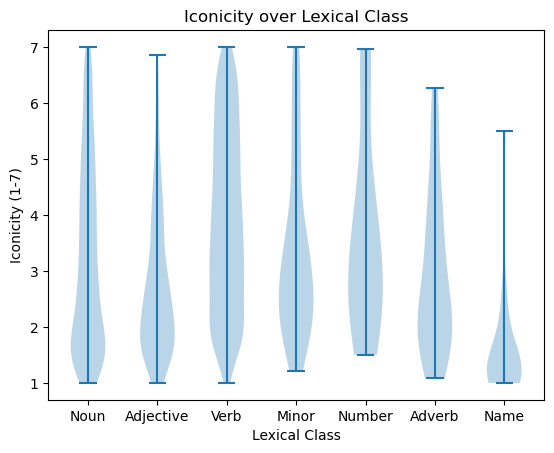

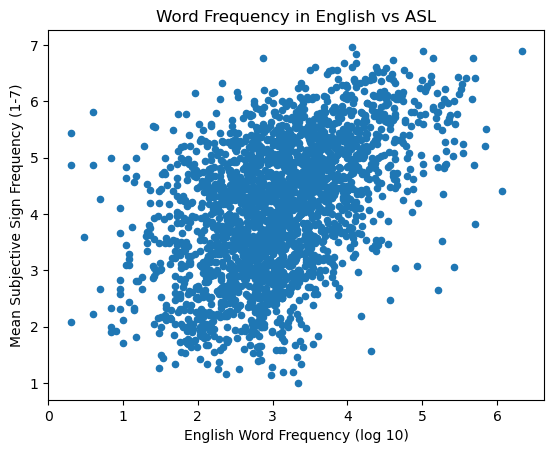

In [76]:
class Graph(Enum):
    SCATTER = 0
    DESCRIBE = 1
    VALUE_CNTS = 2
    BAR = 4
    HISTOGRAM = 5
    VIOLIN = 6
    

def set_labels(title=None, xlabel=None, ylabel=None):
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    

def visualize(x_feature, graph=Graph.VALUE_CNTS, y_feature=None, title=None, xlabel=None, ylabel=None, normalize=True):
    values = df[x_feature]
    match graph:
        case Graph.VALUE_CNTS:
            print(values.value_counts())
        case Graph.DESCRIBE:
            print(values.describe())
        case Graph.BAR:
            values.value_counts(normalize=normalize).plot.bar()
        case Graph.HISTOGRAM:
            values.plot.hist()
        case Graph.SCATTER:
            df.plot.scatter(x_feature, y_feature)
        case Graph.VIOLIN:
            categories = [c for c in df[x_feature].unique() if str(c) != 'nan']
            dataset = []
            for category in categories:
                vals = df[df[x_feature] == category][y_feature].values
                dataset.append(vals)

            dataset = []
            for category in categories:
                vals = df[df[x_feature] == category][y_feature].dropna().values
                dataset.append(vals)

            plt.violinplot(dataset = dataset)

            plt.xticks(range(1, len(categories) + 1), categories)
        case _:
            print("Graph type not found")

    set_labels(title, xlabel, ylabel)
    plt.show()

# visualize('LexicalClass', Graph.BAR, title="Lexical Class", xlabel="Lexical Class", ylabel="Frequency")
# visualize('SignDuration(ms)', Graph.HISTOGRAM, title="", xlabel="", ylabel="")
visualize('LexicalClass', Graph.VIOLIN, y_feature='Iconicity(M)', title="Iconicity over Lexical Class", xlabel="Lexical Class", ylabel="Iconicity (1-7)")
visualize('EnglishWF(lg10)', Graph.SCATTER, y_feature='SignFrequency(M)', title="Word Frequency", xlabel="English Word Frequency (log 10)", ylabel="Mean Subjective Sign Frequency (1-7)")
# visualize('EnglishWF(lg10)', Graph.DESCRIBE)
